<a href="https://colab.research.google.com/github/sriram161/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/learning/Pytorch_perceptron_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn

In [ ]:
centers = [[0.5, -0.5], [-0.5, 0.5]]
n_pts = 100
X,y = datasets.make_blobs(n_samples = n_pts, cluster_std=0.3, centers=centers, random_state=123)
x_data = torch.tensor(X)
y_data = torch.tensor(y).reshape(100, 1)

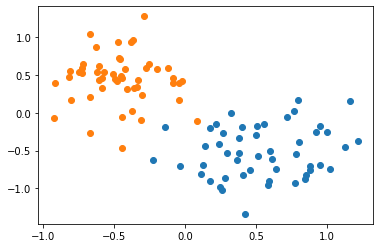

In [ ]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)
  
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

  def predict(self, x):
    return 1 if self.forward(x) >= 0.5 else 0

In [ ]:
torch.manual_seed(1)
model = Model(2, 1)
def get_params(model):
  w, b = model.parameters()
  w1, w2 = w.view(2)
  b1 = b[0]
  return w1.item(), w2.item(), b1.item()

In [ ]:
def plot_fit(model, title):
  plt.title = title
  w1, w2, b1 = get_params(model)
  x1 = np.array([-1.6, 1.5])
  x2 = (w1*x1 +b1)/-w2
  plt.plot(x1,x2, 'r')
  scatter_plot()

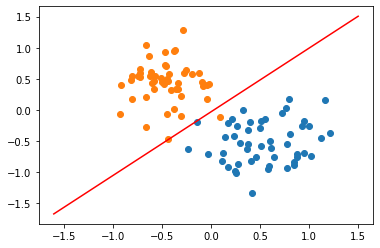

In [ ]:
plot_fit(model, "inital_model")

In [ ]:
criterion = nn.BCELoss()  # Binary Cross Entropy loss Which computes entropy for 2 classess.
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data.float())  # predict Note: x_data is expected as tensor.
  loss = criterion(y_pred, y_data.float())  # compute loss. 
  print('Epoch: ', i, 'Loss: ', loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  0 Loss:  0.2734096348285675
Epoch:  1 Loss:  0.2732360363006592
Epoch:  2 Loss:  0.27306273579597473
Epoch:  3 Loss:  0.2728897035121918
Epoch:  4 Loss:  0.2727168798446655
Epoch:  5 Loss:  0.27254435420036316
Epoch:  6 Loss:  0.2723720967769623
Epoch:  7 Loss:  0.2722000777721405
Epoch:  8 Loss:  0.2720283567905426
Epoch:  9 Loss:  0.2718569040298462
Epoch:  10 Loss:  0.2716856896877289
Epoch:  11 Loss:  0.27151474356651306
Epoch:  12 Loss:  0.27134406566619873
Epoch:  13 Loss:  0.2711736559867859
Epoch:  14 Loss:  0.27100348472595215
Epoch:  15 Loss:  0.2708336114883423
Epoch:  16 Loss:  0.2706639766693115
Epoch:  17 Loss:  0.27049458026885986
Epoch:  18 Loss:  0.27032551169395447
Epoch:  19 Loss:  0.2701566219329834
Epoch:  20 Loss:  0.2699880301952362
Epoch:  21 Loss:  0.2698197066783905
Epoch:  22 Loss:  0.2696516215801239
Epoch:  23 Loss:  0.2694838345050812
Epoch:  24 Loss:  0.26931625604629517
Epoch:  25 Loss:  0.26914894580841064
Epoch:  26 Loss:  0.2689819037914276
Ep

Text(0, 0.5, 'Loss')

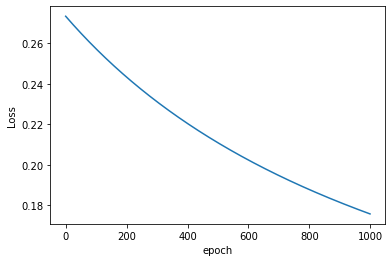

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('Loss')

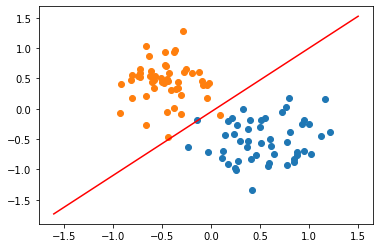

In [ ]:
plot_fit(model, "trained_model")

#### How to test the model by classifiing two points?

Red point prob: 0.020376961678266525
Yellow point prob: 0.9833041429519653


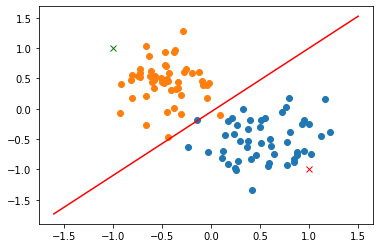

In [ ]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'rx')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'gx')
print(f"Red point prob: {model.forward(point1).item()}")
print(f"green point prob: {model.forward(point2).item()}")
plot_fit(model, title='test_trained_model')